In [1]:
from truthnet import truthnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
Tr=truthnet()
## load data and infer qnet
features,samples = Tr.load_data(datapath="data/PTSD_cognet_test_processed.csv")

Tr.fit(fit=False,modelpath="results/PTSD_cognet_test.joblib")
Tr.getDissonance(outfile="mpi_tmp/PTSD_dissonance_matrix.csv",processes=11)

In [3]:
suspects=Tr.getSuspects(alpha=.01)
suspects.join(pd.read_csv("data/PTSD_cognet_test_processed.csv"))

,mean_dissonance,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
9,0.369462,4,1,2,1,3,5,3,5,3,...,5,4,4,4,5,3,5,5,5,5
60,0.419398,5,4,5,1,4,5,5,5,4,...,5,5,5,5,3,2,5,5,5,5
63,0.390101,5,3,5,3,1,5,5,5,2,...,5,5,5,5,5,5,5,5,5,5
86,0.369530,5,2,5,3,3,5,3,5,4,...,3,4,4,3,5,4,5,5,5,5
98,0.402023,3,2,1,1,1,3,4,4,4,...,4,4,4,4,4,4,5,5,5,4
159,0.373479,4,2,2,2,3,4,3,4,3,...,5,5,4,4,5,2,5,5,5,5
188,0.382831,4,1,3,3,4,3,4,4,2,...,5,3,3,4,3,2,5,5,2,5
210,0.410215,4,2,2,3,2,4,3,3,3,...,4,5,5,5,5,4,4,4,5,5
221,0.386804,4,2,2,3,3,4,3,5,2,...,5,5,5,5,5,5,5,5,5,5
222,0.371270,4,1,1,1,1,5,1,5,1,...,5,5,5,5,5,3,2,2,5,3


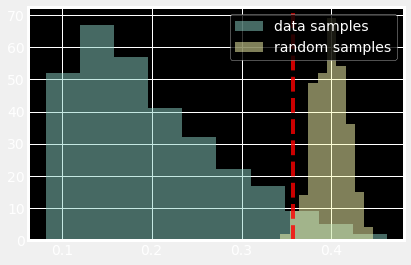

In [4]:
plt.figure()
plt.style.use('dark_background')
dissonance = pd.DataFrame(data=Tr.dissonance.mean(axis=1), columns=["Qnet"])
dissonance["random"] = Tr.urandom_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="data samples")
plt.hist(dissonance["random"], alpha=0.5, label="random samples")
plt.legend()
plt.axvline(Tr.cithreshold[('suspect',0.01)][0], color="red", linestyle="--", alpha=.8)

In [5]:
coresamples=Tr.getCoresamples(alpha=.01,steps=212)
coresamples.join(pd.read_csv("data/PTSD_cognet_test_processed.csv"))

,mean_dissonance,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
0,0.185657,4,2,5,4,2,3,2,3,3,...,2,4,4,3,2,3,2,2,4,2
1,0.153450,3,2,3,3,1,3,2,2,2,...,3,4,4,3,3,3,4,3,4,5
3,0.138878,2,2,5,1,3,2,1,2,2,...,1,2,3,3,3,2,1,1,2,2
4,0.146156,4,1,1,1,2,2,1,1,1,...,2,2,2,2,1,1,2,2,2,3
6,0.184588,2,4,1,3,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.158809,3,1,5,1,1,3,3,4,1,...,2,3,4,4,3,2,2,2,2,5
299,0.141303,4,2,3,4,1,1,1,1,3,...,2,2,2,2,2,2,2,2,2,3
301,0.168078,5,1,2,1,1,3,5,5,3,...,4,3,3,2,3,1,3,2,5,5
302,0.161679,2,1,3,3,1,2,2,2,1,...,1,1,1,1,1,2,2,2,2,2


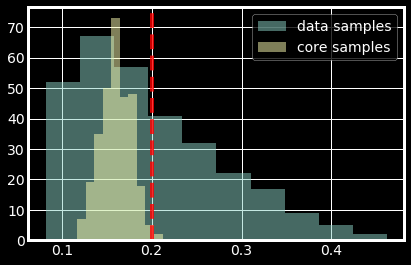

In [6]:
plt.figure()
plt.style.use('dark_background')
dissonance = pd.DataFrame(data=Tr.dissonance.mean(axis=1), columns=["Qnet"])
dissonance["core"] = Tr.null_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="data samples")
plt.hist(dissonance["core"], alpha=0.5, label="core samples")
plt.legend()
plt.axvline(Tr.cithreshold[('core',0.01)][1], color="red", linestyle="--", alpha=.8)

In [7]:
Tr.cithreshold

{('suspect', 0.01): (0.35675162154753465, 0.44028901433940554),
 ('core', 0.01): (0.12054447446908387, 0.2005364853817568)}